#### Boston Data Analysis

The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and many other attributes.
The dataset itself is available here (https://www.kaggle.com/c/boston-housing/data). However, because we are going to use scikit-learn, we can import it right away from the scikit-learn itself.

In [1]:
#Importing libraries

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Importing and loading boston data

from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
import pandas as pd

boston_data = pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston_target = pd.DataFrame(data=boston.target)

In [5]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Checking for the datatypes

boston_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [7]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [8]:
#Converting CHAS to category type

boston_data['CHAS'] = boston_data['CHAS'].astype('int')

#Converting CHAS to category

boston_data['CHAS'] = boston_data['CHAS'].astype('category')

In [9]:
#Checking for missing values

pd.isna(boston_data).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
boston_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
#Renaming Target variable

boston_target = boston_target.rename(columns = {"0":"Target"})

In [12]:
#Combining independent and dependent variables

bostondata = pd.concat([boston_data,boston_target],axis=1)
bostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bostondata = bostondata.rename(columns = {0:"Target"})

In [14]:
#Profile of data

import pandas_profiling

pandas_profiling.ProfileReport(bostondata)

C:\Users\Mounika\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Number of variables,14
Number of observations,506
Total Missing (%),0.0%
Total size in memory,52.1 KiB
Average record size in memory,105.3 B
Numeric,12
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


### Checking for Linear Regression Assumptions

#### Checking for Multi Collinearity in Data

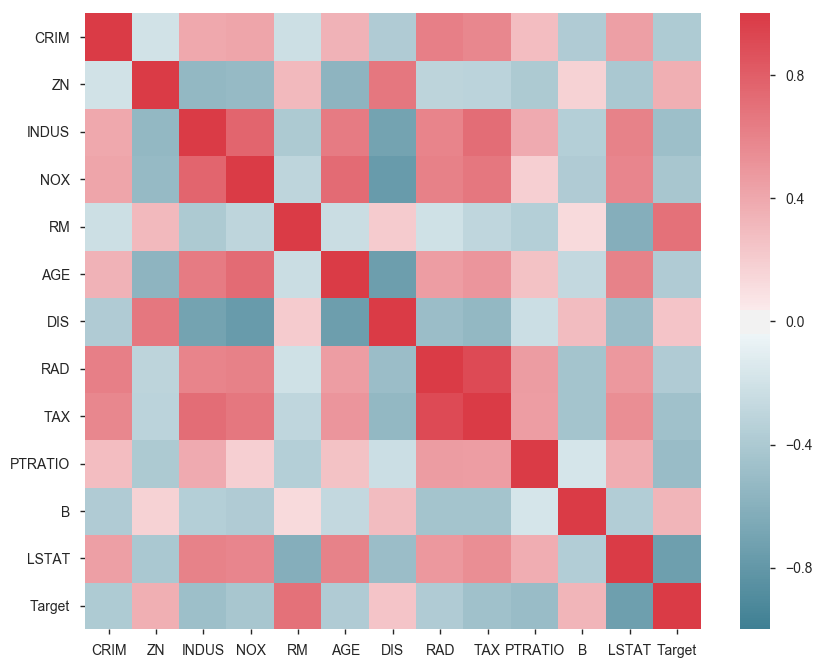

In [15]:
#Plotting a correlation matrix

f, ax = plt.subplots(figsize=(10, 8))
corr = bostondata.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

We observe that few of the vaiables are highly correlated. So, we check for their Variation Inflation Factor(VIF) values.

In [16]:
#Dropping categorical variables

numeric_data = boston_data.drop(['CHAS'],axis=1)

In [17]:
#Observing VIF values for numeric data

from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["Features"] = numeric_data.columns
vif["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
vif

,Features,VIF
0,CRIM,2.069875
1,ZN,2.843220
2,INDUS,14.334269
3,NOX,73.656096
4,RM,77.537063
5,AGE,21.335983
6,DIS,14.698753
7,RAD,14.990711
8,TAX,60.360593
9,PTRATIO,84.231203


We observe that the variables have very high VIF values. The best way to deal with this multi collinearity problem is to mean center the data.This process involves calculating the mean for each continuous independent variable and then subtracting the mean from all observed values of that variable. Then, use these centered variables in your model.There are other standardization methods, but the advantage of just subtracting the mean is that the interpretation of the coefficients remains the same. The coefficients continue to represent the mean change in the dependent variable given a 1 unit change in the independent variable. 

In [18]:
#Mean centering the data

colmeans = numeric_data.sum()/numeric_data.shape[0]
centered_data = numeric_data-colmeans

centered_data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-3.587441,6.636364,-8.826779,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063
1,-3.566451,-11.363636,-4.066779,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063
2,-3.566471,-11.363636,-4.066779,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063
3,-3.561391,-11.363636,-8.956779,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063
4,-3.524711,-11.363636,-8.956779,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063


In [19]:
#Calculating VIF for centered data

# For each X, calculate VIF and save in dataframe
vif1 = pd.DataFrame()
vif1["Features"] = centered_data.columns
vif1["VIF"] = [variance_inflation_factor(centered_data.values, i) for i in range(centered_data.shape[1])]
vif1

,Features,VIF
0,CRIM,1.768968
1,ZN,2.298144
2,INDUS,3.948771
3,NOX,4.390146
4,RM,1.932303
5,AGE,3.092845
6,DIS,3.955570
7,RAD,7.394174
8,TAX,8.876200
9,PTRATIO,1.783412


There is a lot of decrease in VIF values after centering the data. But the RAD and TAX variables still possess slightly high VIF values.

In [20]:
data = centered_data
data['CHAS'] = boston_data['CHAS']
data['Target'] = bostondata['Target']
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,Target
0,-3.587441,6.636364,-8.826779,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063,0,24.0
1,-3.566451,-11.363636,-4.066779,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063,0,21.6
2,-3.566471,-11.363636,-4.066779,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063,0,34.7
3,-3.561391,-11.363636,-8.956779,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063,0,33.4
4,-3.524711,-11.363636,-8.956779,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063,0,36.2


In [21]:
#Distribution of Classes in CHAS

group_records = pd.crosstab(index=bostondata["CHAS"],  # Make a crosstab
                              columns="count")
print(group_records)

col_0  count
CHAS        
0        471
1         35


#### Assumption of linearity

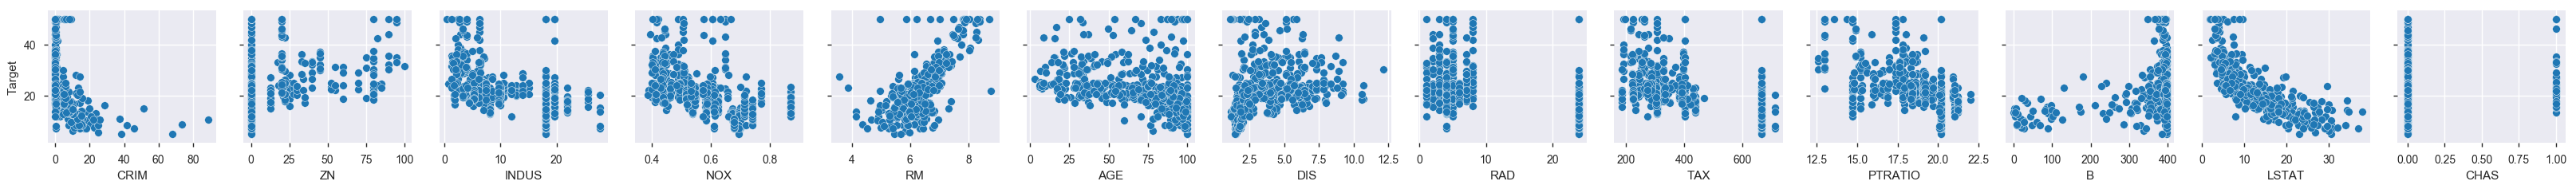

In [22]:
sns.pairplot(bostondata,x_vars=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS'],y_vars = ['Target'])

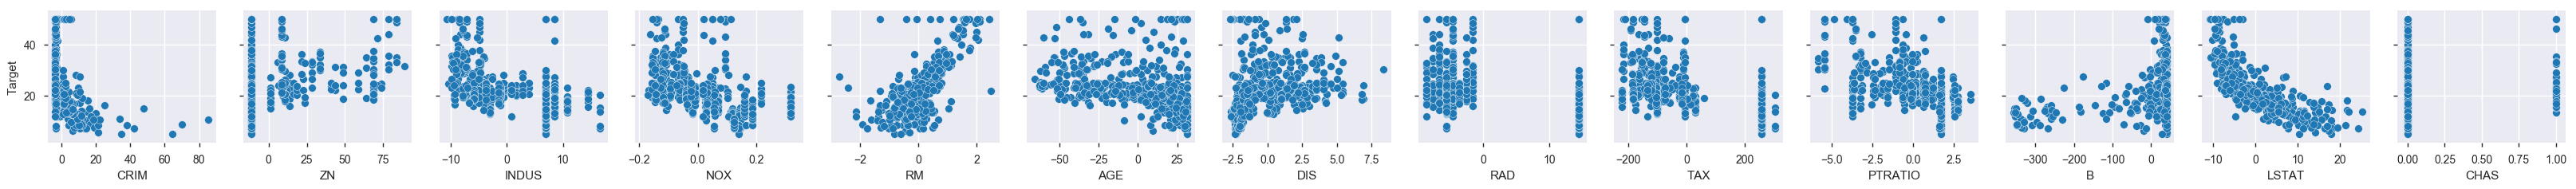

In [23]:
sns.pairplot(data,x_vars=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS'],y_vars = ['Target'])

C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


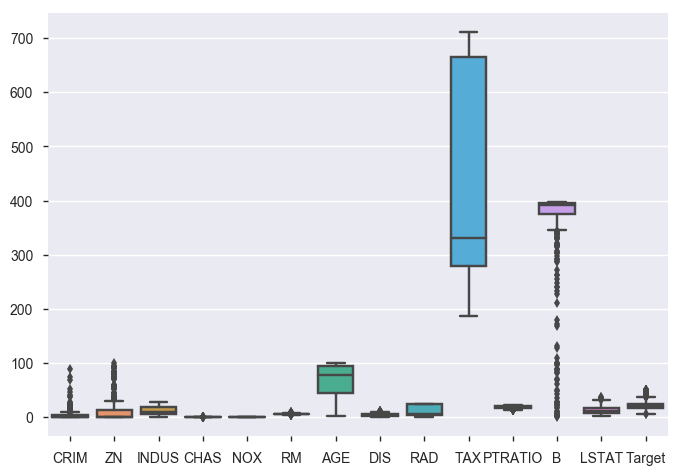

In [24]:
sns.boxplot(bostondata)

plt.hist(boston_data.B)

This implies that most of the town have high proportion of blacks. But lets see if they have any impact on our target.

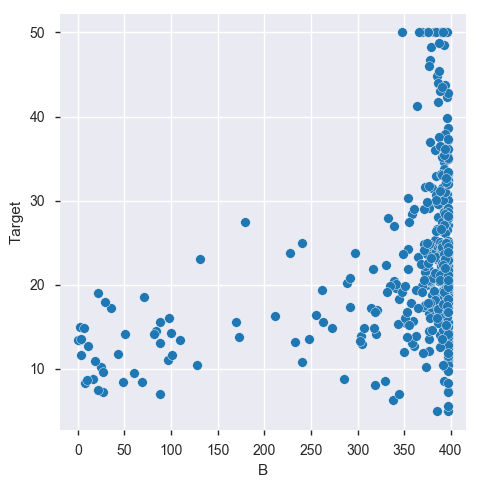

In [25]:
sns.pairplot(data=bostondata,x_vars='B',y_vars='Target',size=5)

There appears no significant direct relationship between the proportion of blacks per town and our target value. 

### Model Building

In [26]:
#Splitting the data to train and test set

from sklearn.cross_validation import train_test_split

X = data.drop(['Target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, boston_target, test_size=0.2, random_state=4)

C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
#Fitting a Linear Regression model

from sklearn import linear_model
from sklearn.cross_validation import cross_val_score

model = linear_model.LinearRegression()
scores = cross_val_score(model,X,boston_target,cv=10,scoring='mean_squared_error')

C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mounika\Anaconda3\l

In [54]:
print(scores)

[  -9.30130569  -14.17208374  -14.10631149  -35.19479431  -31.92474931
  -19.85853694   -9.95792    -168.53075207  -33.61791833  -10.96654317]


In [29]:
lin_mod = model.fit(x_train,y_train)
linear_predictions = model.predict(x_test)
r2_score(y_test, linear_predictions)  

0.7264701379682995

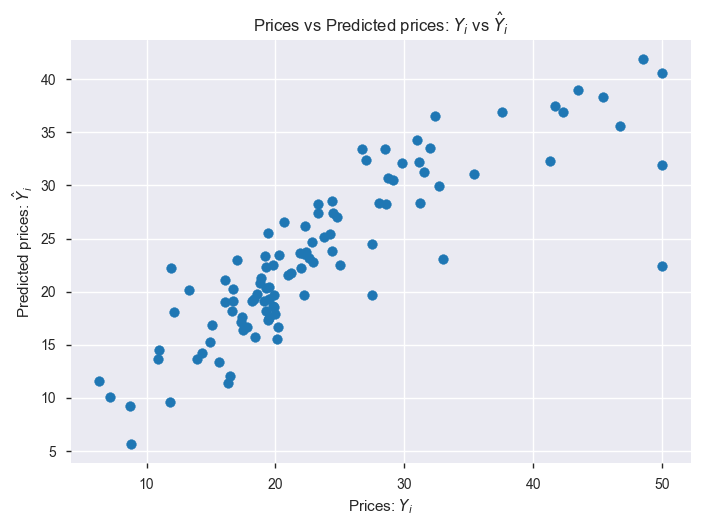

In [30]:
#Scatter plot for predicted vs actual values

plt.scatter(y_test, linear_predictions)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [31]:
#calculating mse

mse = np.mean((linear_predictions - y_test)**2)

mse 

0    25.407977
dtype: float64

In [32]:
print("Training set score: {:.2f}".format(lin_mod.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lin_mod.score(x_test, y_test)))

Training set score: 0.74
Test set score: 0.73


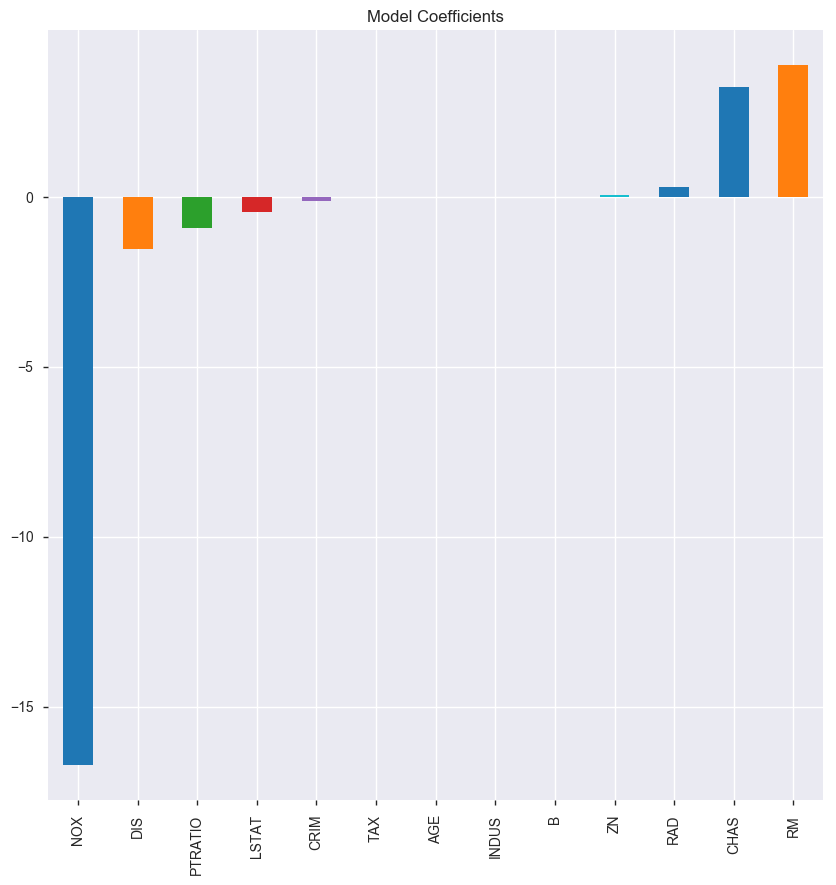

In [33]:
#Checking the magnitude of coefficients

from pandas import Series

coef = (model.coef_).flatten()
predictors = x_train.columns

coeff = Series(coef,predictors).sort_values()

coeff.plot(kind='bar', title='Model Coefficients',figsize=(10,10))

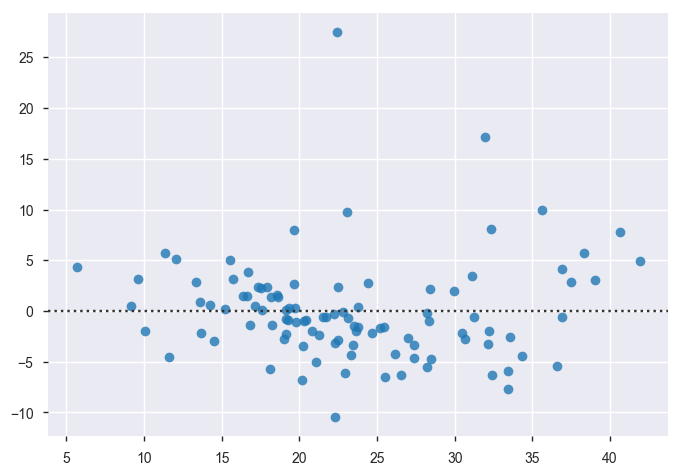

In [34]:
#Plotting fitted vs residual plot

sns.residplot(linear_predictions,y_test,data=data)

In [35]:
#Fitting Linear Regression Using statsmodel package

import statsmodels.formula.api as smf

model_f = 'Target ~ CRIM + \
                 ZN + \
                 INDUS + \
                 CHAS + \
                 NOX + \
                 RM + \
                 AGE + \
                 DIS + \
                 RAD + \
                 TAX + \
                 PTRATIO + \
                 B + \
                 LSTAT'

mod = smf.ols(formula=model_f, data=data)
model_fit = mod.fit()

In [36]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

C:\Users\Mounika\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


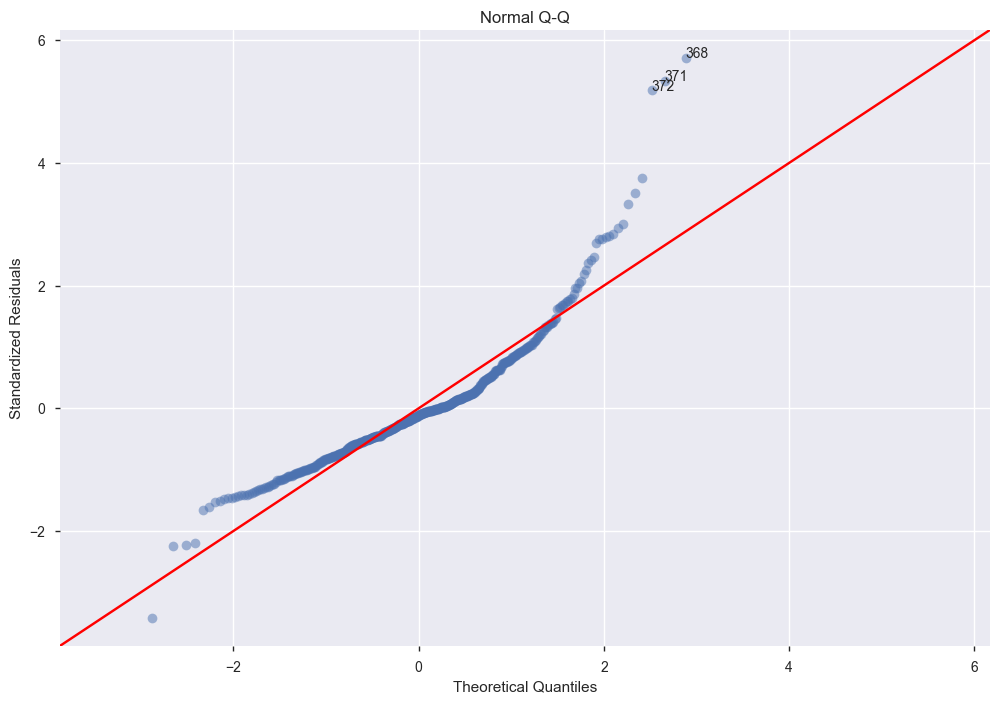

In [37]:
import statsmodels.api as sm

QQ = sm.ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

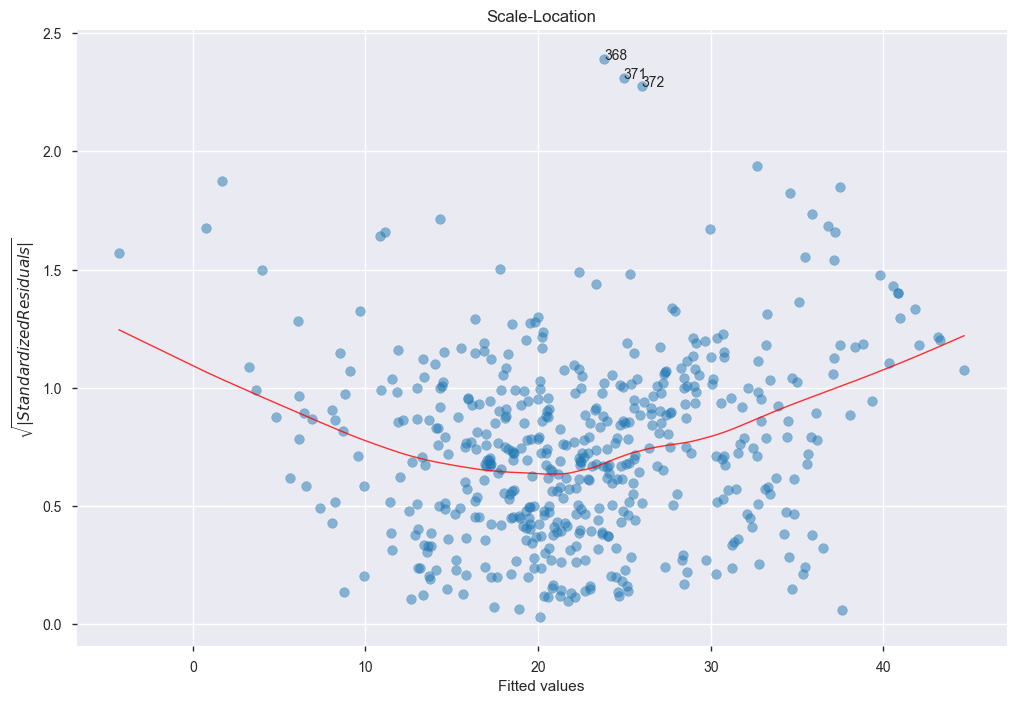

In [38]:
import matplotlib.pyplot as plt
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]))

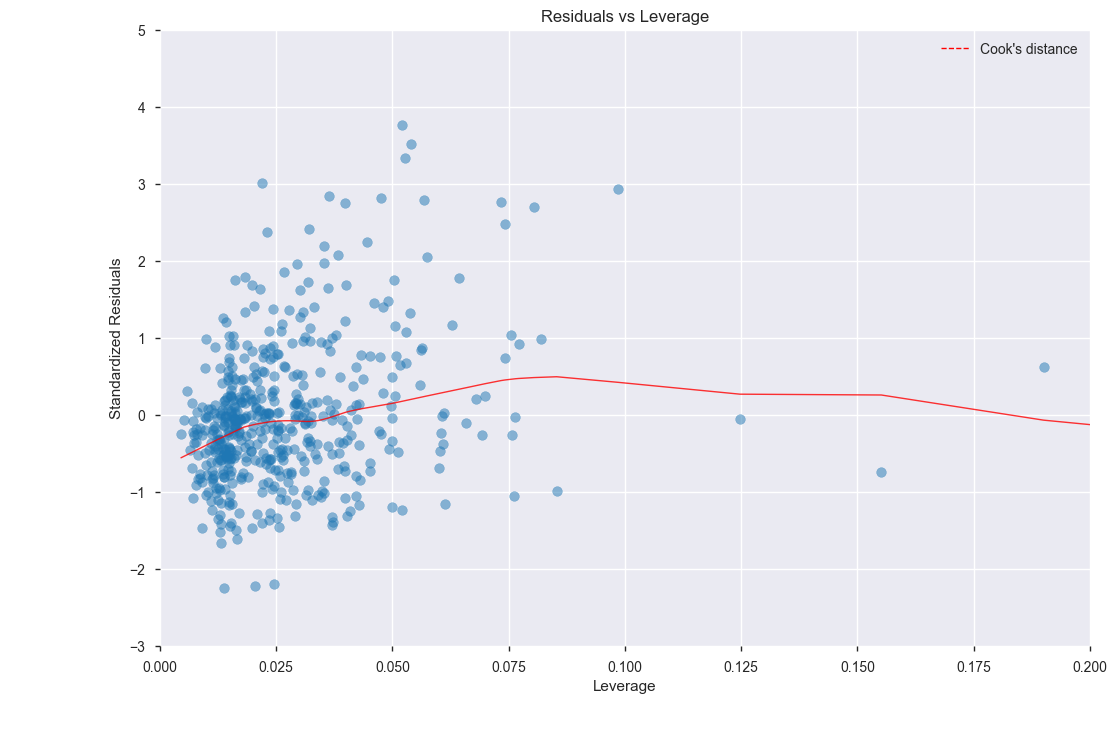

In [39]:
import matplotlib.pyplot as plt
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');


In [40]:
model.coef_

array([[-1.14743504e-01,  4.70875035e-02,  8.70282354e-03,
        -1.67240567e+01,  3.87662996e+00, -1.08218769e-02,
        -1.54144627e+00,  2.92604151e-01, -1.33989537e-02,
        -9.07306805e-01,  8.91271054e-03, -4.58747039e-01,
         3.23818824e+00]])

In [41]:
#Printing the model coefficients

model_fit.params

Intercept    22.346839
CHAS[T.1]     2.688561
CRIM         -0.107171
ZN            0.046395
INDUS         0.020860
NOX         -17.795759
RM            3.804752
AGE           0.000751
DIS          -1.475759
RAD           0.305655
TAX          -0.012329
PTRATIO      -0.953464
B             0.009393
LSTAT        -0.525467
dtype: float64

In [42]:
#Printing the confidence intervals for coefficients

model_fit.conf_int()

,0,1
Intercept,21.916106,22.777571
CHAS[T.1],0.995659,4.381463
CRIM,-0.171443,-0.042898
ZN,0.019422,0.073368
INDUS,-0.099968,0.141689
NOX,-25.302434,-10.289083
RM,2.983470,4.626035
AGE,-0.025205,0.026707
DIS,-1.867703,-1.083814
RAD,0.175323,0.435987


In [43]:
model_fit.pvalues

Intercept    0.000000e+00
CHAS[T.1]    1.912339e-03
CRIM         1.126402e-03
ZN           7.836070e-04
INDUS        7.345971e-01
NOX          4.117296e-06
RM           2.207486e-18
AGE          9.546859e-01
DIS          6.017651e-13
RAD          5.189664e-06
TAX          1.117826e-03
PTRATIO      1.268218e-12
B            5.072875e-04
LSTAT        6.595808e-23
dtype: float64

In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 31 May 2018   Prob (F-statistic):          6.95e-135
Time:                        12:35:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.3468      0.219    101.936      0.000      21.916      22.778
CHAS[T.1]      2.6886      0.862      3.120      0.002       0.996       4.381
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#Fitting SVM Model 

from sklearn.svm import SVR
SVR_model = SVR(kernel = 'linear')
scores = cross_val_score(SVR_model,X,boston_target,cv=10,scoring='mean_squared_error')
#SVR_model.fit(X, y)


C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we

In [51]:
scores

array([  -6.94036199,   -8.39437093,   -8.73578308,  -46.16753172,
        -24.36659391,  -22.93384671,   -5.8165465 , -160.0384675 ,
        -38.82834912,  -13.23507938])

In [49]:
?cross_val_score()

In [52]:
SVR_model.fit(x_train,y_train)
SVR_predictions = SVR_model.predict(x_test)
r2_score(y_test, SVR_predictions)  

C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6755913555533706

### Using Regularization Techniques

In [264]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha = 0,normalize=True )

In [265]:
rid_reg = ridgeReg.fit(x_train,y_train)

In [206]:
ridge_pred = ridgeReg.predict(x_test)

#calculating mse

mse = np.mean((ridge_pred - y_test)**2)

mse 

0    25.407977
dtype: float64

In [207]:
ridgeReg.score(x_test,y_test)

0.7264701379682985

In [208]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [267]:
print("Training set score: {:.2f}".format(rid_reg.score(x_train, y_train)))
print("Test set score: {:.2f}".format(rid_reg.score(x_test, y_test)))

Training set score: 0.74
Test set score: 0.73


In [209]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.0466301673441609

In [210]:


ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(x_train, y_train)
ridge_predictions = ridge4.predict(x_test)
mean_squared_error(y_test,ridge_predictions )

26.166834061592517

In [211]:
r2_score(y_test, ridge_predictions)  

0.7183006506037988

In [214]:
coef_ridge = (ridge4.coef_).flatten()
type(coef_ridge)

numpy.ndarray

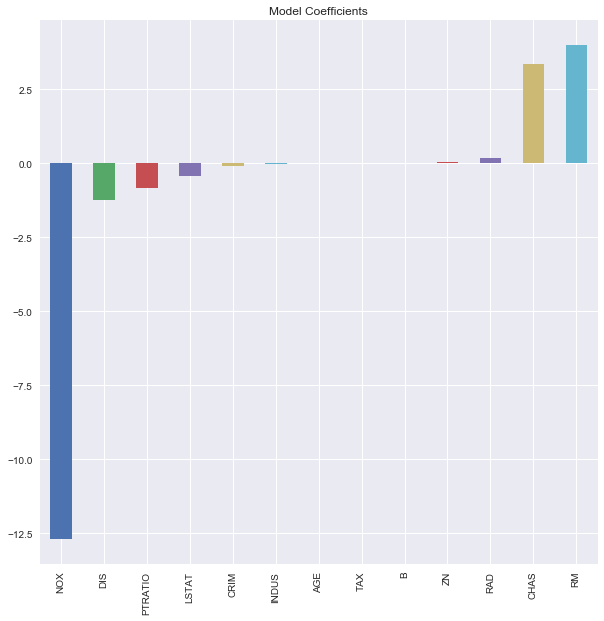

In [215]:
#Checking the magnitude of coefficients
from pandas import Series
predictors = x_train.columns

coeff = Series(coef_ridge,predictors).sort_values()

coeff.plot(kind='bar', title='Model Coefficients',figsize=(10,10))

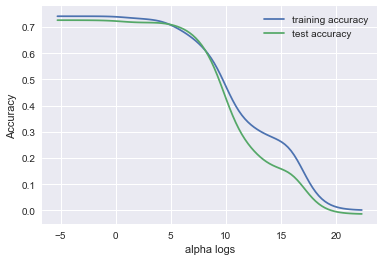

In [262]:
training_accuracy = []
test_accuracy = []

for alpha in alphas:
    # build the model
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    # record training accuracy
    training_accuracy.append(ridge.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(ridge.score(x_test, y_test))

plt.plot(np.log(np.array(alphas)),
         training_accuracy, label="training accuracy")
plt.plot(np.log(np.array(alphas)),
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha logs")
plt.legend()

In [157]:
#Using Lasso Regression

from sklearn.linear_model import Lasso


lassoReg = Lasso(alpha=0,normalize=True)
lassoReg.fit(x_train,y_train)




C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [148]:
lasso_pred = lassoReg.predict(x_test)

In [149]:
lasso_pred1 = lasso_pred.reshape(102,1)

In [150]:
#calculating mse

mse = np.mean((lasso_pred1 - y_test)**2)

mse 

0    0.000007
dtype: float64

In [151]:
lassoReg.score(x_test,y_test)

0.9999999240924214

Regularization is of no help in this case

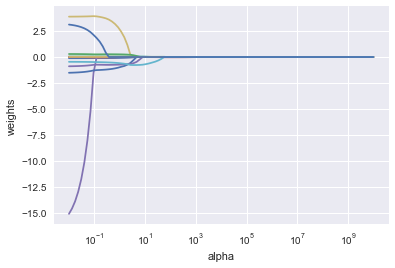

In [256]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [224]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
lasso_predictions = lasso.predict(x_test)
mean_squared_error(y_test,lasso_predictions )

C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


25.40972010649106

In [225]:
r2_score(y_test,lasso_predictions)

0.7264513694897305

In [226]:
coef_lasso = (lasso.coef_).flatten()
type(coef_lasso)

numpy.ndarray

In [228]:
lasso.alpha

0.0005369851174316948

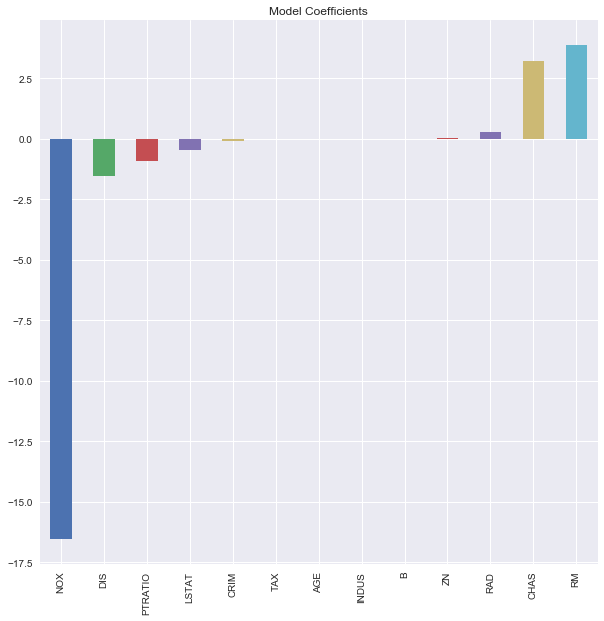

In [227]:
#Checking the magnitude of coefficients
from pandas import Series
predictors = x_train.columns

coeff = Series(coef_lasso,predictors).sort_values()

coeff.plot(kind='bar', title='Model Coefficients',figsize=(10,10))

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,Target
0,-3.587441,6.636364,-8.826779,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063,0,24.0
1,-3.566451,-11.363636,-4.066779,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063,0,21.6
2,-3.566471,-11.363636,-4.066779,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063,0,34.7
3,-3.561391,-11.363636,-8.956779,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063,0,33.4
4,-3.524711,-11.363636,-8.956779,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063,0,36.2
5,-3.563911,-11.363636,-8.956779,-0.096695,0.145366,-9.874901,2.267157,-6.549407,-186.237154,0.244466,37.445968,-7.443063,0,28.7
6,-3.505471,1.136364,-3.266779,-0.030695,-0.272634,-1.974901,1.765457,-4.549407,-97.237154,-3.255534,38.925968,-0.223063,0,22.9
7,-3.449211,1.136364,-3.266779,-0.030695,-0.112634,27.525099,2.155457,-4.549407,-97.237154,-3.255534,40.225968,6.496937,0,27.1
8,-3.382521,1.136364,-3.266779,-0.030695,-0.653634,31.425099,2.287057,-4.549407,-97.237154,-3.255534,29.955968,17.276937,0,16.5
9,-3.423721,1.136364,-3.266779,-0.030695,-0.280634,17.325099,2.797057,-4.549407,-97.237154,-3.255534,30.035968,4.446937,0,18.9
